**MNIST dataset downloaded from kaggle**

In [1]:
#install dependencies
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"k12shreyam","key":""}'}

In [0]:
#kaggle API client expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#this permissions change avoids a warning on kaggle tool startup 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#import the dataset we want to use for project.
!kaggle competitions download -c digit-recognizer

 87% 64.0M/73.2M [00:01<00:00, 41.0MB/s]
100% 73.2M/73.2M [00:01<00:00, 63.1MB/s]
 84% 41.0M/48.8M [00:01<00:00, 30.8MB/s]
100% 48.8M/48.8M [00:01<00:00, 37.4MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 94.2MB/s]


In [5]:
#imported files from kaggle 
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


In [7]:
import pandas as pd

df= pd.read_csv('train.csv')
print(df.head())

l=df['label']
d=df.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [8]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


In [11]:
labels=l.head(15000)
data=d.head(15000)
print("Shape of train dataset:",data.shape)

Shape of train dataset: (15000, 784)


In [13]:
#data-preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit_transform(data)
print(scaler.shape)

(15000, 784)


**t-SNE using Scikit-Learn**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


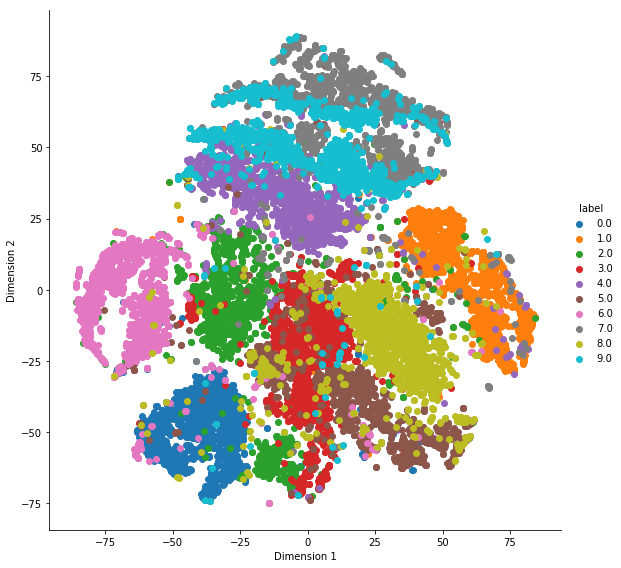

In [14]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#with perplexity=30 & n_iter=1000

model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(scaler)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','label'))
sn.FacetGrid(data=tsne_df,hue='label',size=8).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


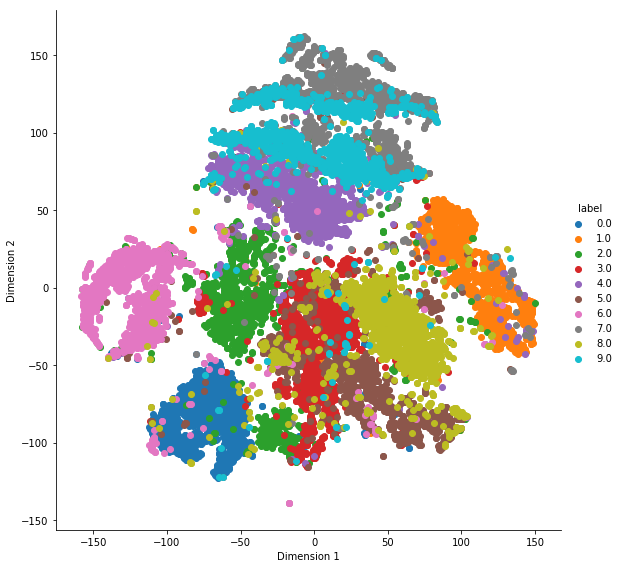

In [15]:
#with perplexity=30 & n_iter=5000

model=TSNE(n_components=2,random_state=0,n_iter=5000)
tsne_data=model.fit_transform(scaler)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','label'))
sn.FacetGrid(data=tsne_df,hue='label',size=8).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()

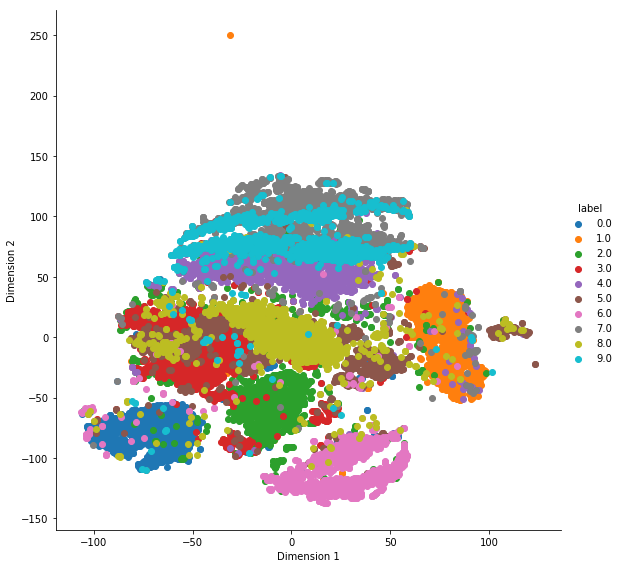

In [16]:
#with perplexity=50 & n_iter=5000

model=TSNE(n_components=2,perplexity=50,random_state=0,n_iter=5000)
tsne_data=model.fit_transform(scaler)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','label'))
sn.FacetGrid(data=tsne_df,hue='label',height=8).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()

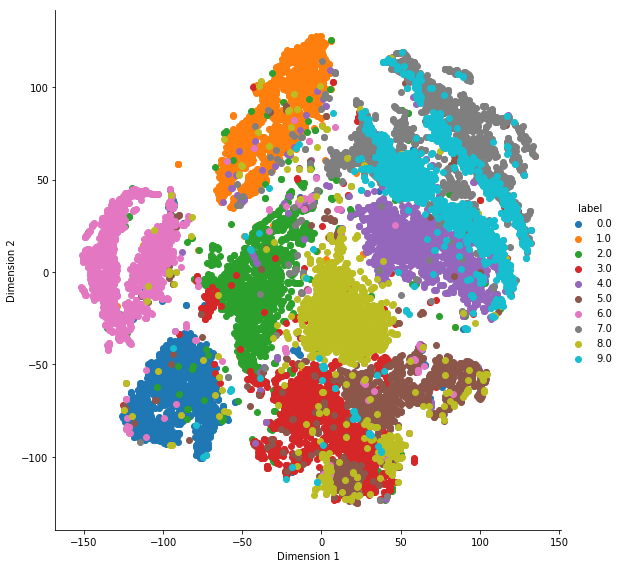

In [19]:
#with perplexity=35 & n_iter=5000

model=TSNE(n_components=2,perplexity=35,random_state=0,n_iter=5000)
tsne_data=model.fit_transform(scaler)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','label'))
sn.FacetGrid(data=tsne_df,hue='label',height=8).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()

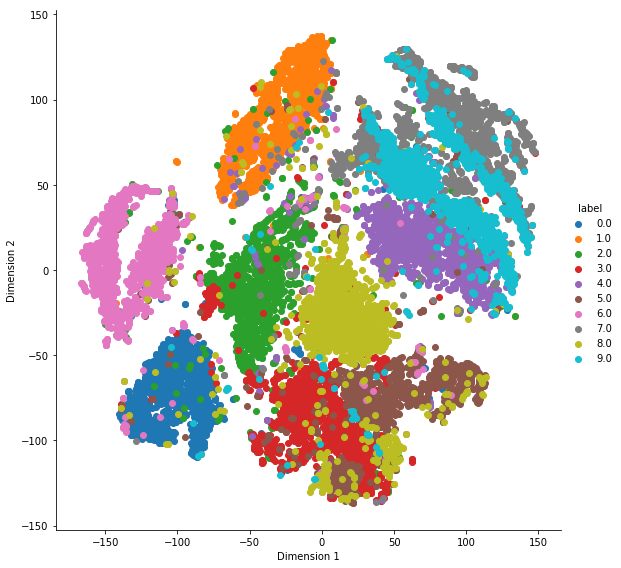

In [20]:
#with perplexity=35 & n_iter=8000

model=TSNE(n_components=2,perplexity=35,random_state=0,n_iter=8000)
tsne_data=model.fit_transform(scaler)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','label'))
sn.FacetGrid(data=tsne_df,hue='label',height=8).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.show()